# Session 6: Use Pandas to index, split, apply, and combine data - Assignment

## [EAA - ARC Python Primer for Accounting Research](https://martien.netlify.app/book/example/)

### Session 6: Use Pandas to index, split, apply, and combine data 
## Assignment
#### EBA data and the evolution of [Fair-Value-Hierarchy](https://ifrscommunity.com/knowledge-base/fair-value-hierarchy/) data.

---

This assignment requires you examine the evolution of Level 1, 2, and 3 assets of European banks. 

The examination requires you to download and munge data from the EBA Risk Dashboard, which is part of the regular risk assessment conducted by the EBA and complements the Risk Assessment Report. 

The EBA Risk Dashboard summarizes the main risks and vulnerabilities in the banking sector in the European Union (EU) by looking at the evolution of Risk Indicators (RI) among a sample of banks across the EU.

The [EBA Risk Dashboard pdf](https://www.eba.europa.eu/sites/default/documents/files/document_library/Risk%20Analysis%20and%20Data/Risk%20dashboard/Q3%202021/1025829/EBA%20Dashboard%20-%20Q3%202021%20v2.pdf?retry=1) has lots of tables, but for research purposes it is better to get the data in machine readable form.

Luckily the EBA thought about us. Under the name [the intractive tool](https://www.eba.europa.eu/sites/default/documents/files/document_library/Risk%20Analysis%20and%20Data/Risk%20dashboard/Q3%202021/1025834/EBA%20Interactive%20Dashboard%20-%20Q3%202021%20-%20Protected.xlsm) they offer an Excel file with a treasure trove of data.

This time we need the data from the `Statistical annex` of the EBA Risk Dashboard.

---

**Required (1)**: From the [EBA Risk Dashboard website](https://www.eba.europa.eu/risk-analysis-and-data/risk-dashboard), **download the [interactive tool](https://www.eba.europa.eu/sites/default/documents/files/document_library/Risk%20Analysis%20and%20Data/Risk%20dashboard/Q3%202021/1025834/EBA%20Interactive%20Dashboard%20-%20Q3%202021%20-%20Protected.xlsm)**: `EBA Interactive Dashboard - Q3 2021 - Protected.xlsm`.


**Save** the file to a folder on your drive, e.g. `D:/users/my_user_name_here/EAA_python/data/`. See this [link](https://www.youtube.com/watch?v=hUW5MEKDtMM) and this [link](https://www.youtube.com/watch?v=7ABkcHLdG_A) for explanations of folders and directories.

**Open the file using Excel**, to quickly get an overview of the data, specifically the data in the statistical annex. See sheets `Annex database`, `Data Annex`, and `Mapping`.

In [1]:
# The usual preamble
import pandas as pd
import numpy as np
import os

if os.name=='nt':  # for Windows users
    os.chdir('D:/users/my_user_name_here/EAA_python/data/')  # note the forward slashes, change 'martien' to your user name
else:
    os.chdir('/home/martien/Nextcloud/Dropbox/EAA_python/data/')  # For Linux or Mac

In [2]:
# Set the file name:
fn = 'EBA Interactive Dashboard - Q3 2021 - Protected.xlsm'

---

**Required (2)**: We know the data definition are hard to understand. Therefore: create a data frame with definitions from the sheet 'Mapping' in the Excel file. 

The data frame should have these column names `['Label', 'Item']`, the former should become the index.

Use the `clean_text` function to eliminate line breaks form the `Item` variable.

In [3]:
def clean_text(s):
    return s.replace('\n', ' ').strip() # Get rid of line breaks and trim leading and lagging spaces. 

def annex_data_definitions(fn, sn):
    df = pd.read_excel(fn, sheet_name=sn, usecols='A,C', skiprows=[0]).dropna()
    df.columns=['Label','Item']
    df['Item'] = df['Item'].apply(clean_text)
    df.set_index('Label', inplace=True)
    return df

df_defs = annex_data_definitions(fn, 'Mapping')

For Jupyter notebook users: To show all frame rows in your notebook, use the following setting ([from Stackoverflow](https://stackoverflow.com/questions/47022070/display-all-dataframe-columns-in-a-jupyter-python-notebook)).

In [4]:
pd.options.display.max_rows = 200

In [5]:
df_defs

,Item
Label,
T01_1,Asset composition - Cash balances
T01_2,Asset composition - Equity instruments
T01_3,Asset composition - Debt securities
T01_4,Asset composition - Loans and advances
T01_5,Asset composition - Derivatives
T01_6,Asset composition - Other Assets
T02_1,Total Assets
T02_2,Total Financial Assets
T03_1,Financial Assets - Share of financial assets v...


---

**Required (3a)**: Create a data frame from the sheet: `Data Annex`, columns `L:M,O:AQ`. Name that data frame `df`.

- While you are at it, include this parameter setting in your `pd.read_excel` statement: `na_values = 'n.a.'`. This converts all `n.a.` cells into a properly coded missing value.
- Using Pandas [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) function, change columns names as follows: `lbl`  to  `Label` and `NSA` to `Country`.
- Eliminate rows from "country" EU.
- Set `Label` and `Country` columns as index.



In [6]:
df = pd.read_excel(fn, sheet_name='Data Annex', usecols='L:M,O:AQ', na_values = 'n.a.')
df.rename(columns = {'lbl': 'Label', 'NSA': 'Country'} , inplace=True)
df = df.loc[df['Country']!='EU']
df.set_index(['Label', 'Country'], inplace=True)

In [7]:
df

201409    201412    201503    201506    201509    201512  \
Label    Country                                                               
T01_1    AT       0.038263  0.042391  0.043766  0.051577  0.058128  0.067526   
         BE       0.056810  0.043531  0.053535  0.049346  0.051326  0.052811   
         BG       0.089231  0.109729  0.144881  0.157030  0.178785  0.208358   
         CY       0.092246  0.105164  0.144747  0.152794  0.165236  0.175125   
         CZ       0.062051  0.105606  0.101504  0.095814  0.112473  0.128487   
...                    ...       ...       ...       ...       ...       ...   
RE_T12_4 PT       0.423583  0.479333  0.489188  0.486557  0.510364  0.486606   
         RO       0.480884  0.548742  0.522233  0.531078  0.504154  0.490713   
         SE       0.008378  0.017954  0.016739  0.010556  0.016317  0.017715   
         SI            NaN       NaN       NaN       NaN       NaN  0.659964   
         SK       0.248401  0.220884  0.222154  0.219774  0.174222  0.186842   

                    201603    201606    201609    201612  ...    201906  \
Label    Country                                          ...             
T01_1    AT       0.064117  0.063733  0.066796  0.088859  ...  0.087307   
         BE       0.049397  0.044549  0.065213  0.064938  ...  0.080590   
         BG       0.188681  0.174743  0.191399  0.212434  ...  0.144975   
         CY       0.172958  0.183773  0.182009  0.194335  ...  0.256464   
         CZ       0.121210  0.107126  0.111384  0.113439  ...  0.028808   
...                    ...       ...       ...       ...  ...       ...   
RE_T12_4 PT       0.503235  0.521379  0.507111  0.502537  ...  0.298085   
         RO       0.495542  0.442771  0.404571  0.386827  ...  0.159845   
         SE       0.016400  0.021505  0.008722  0.008825  ...  0.006634   
         SI       0.612341  0.611319  0.618247  0.516679  ...  0.182775   
         SK       0.169445  0.152086  0.138377  0.119771  ...  0.064511   

                    201909    201912    202003    202006    202009    202012  \
Label    Country                                                               
T01_1    AT       0.082695  0.085032  0.111176  0.133546  0.155706  0.176632   
         BE       0.078226  0.060934  0.092853  0.127431  0.143363  0.154896   
         BG       0.144049  0.122301  0.160374  0.174730  0.183372  0.204708   
         CY       0.252473  0.281167  0.246088  0.240311  0.243302  0.264072   
         CZ       0.028781  0.025902  0.043012  0.025621  0.029452  0.022069   
...                    ...       ...       ...       ...       ...       ...   
RE_T12_4 PT       0.269209  0.202984  0.212116  0.203229  0.197396  0.166880   
         RO       0.150388  0.123216  0.121756  0.112590  0.112778  0.104954   
         SE       0.010578  0.011952  0.011252  0.011083  0.013784  0.011735   
         SI       0.174745  0.136551  0.128127  0.125129  0.113037  0.114484   
         SK       0.058526  0.059748  0.056522  0.058404  0.041082  0.041807   

                    202103    202106    202109  
Label    Country                                
T01_1    AT       0.198222  0.200358  0.196141  
         BE       0.196077  0.206101  0.203324  
         BG       0.176516  0.159360  0.165909  
         CY       0.291133  0.366872  0.368586  
         CZ       0.023782  0.021964  0.042080  
...                    ...       ...       ...  
RE_T12_4 PT       0.110750  0.111353  0.106501  
         RO       0.105535  0.102966  0.082841  
         SE       0.011222  0.015494  0.014437  
         SI       0.103130  0.076448  0.075147  
         SK       0.033110  0.034152  0.038710  

[4881 rows x 29 columns]

In [8]:
# Check the column names
print(list(df))

[201409, 201412, 201503, 201506, 201509, 201512, 201603, 201606, 201609, 201612, 201703, 201706, 201709, 201712, 201803, 201806, 201809, 201812, 201903, 201906, 201909, 201912, 202003, 202006, 202009, 202012, 202103, 202106, 202109]


---

**Required (3b)**: Use `melt` to create a long data frame from `df`. Name that data frame `dfm`.

- `id_vars` should be `['Label', 'Country']`.
- `value_vars` should be the list of column names of `df`.
- `var_name` should be `Date`, 
- `value_name` should be `value`.
- use `Label` and `Country` as index
- use `dropna()` to eliminate missing `value` observations from `dfm`.
Note, to make it work, apply `melt` to the the reset data frame: `df.reset_index()`

In [9]:
# Melt
dfm = pd.melt(df.reset_index(), id_vars=['Label', 'Country'], value_vars=list(df), var_name='Date', value_name='value')

In [10]:
dfm.head(3) 

,Label,Country,Date,value
0,T01_1,AT,201409,0.038263
1,T01_1,BE,201409,0.056810
2,T01_1,BG,201409,0.089231


In [11]:
# Dropna
dfm.dropna(subset=['value'], inplace=True)

In [12]:
dfm.tail(3) 

,Label,Country,Date,value
141546,RE_T12_4,SE,202109,0.014437
141547,RE_T12_4,SI,202109,0.075147
141548,RE_T12_4,SK,202109,0.038710


In [13]:
# Set index
dfm = dfm.set_index(['Label', 'Country'])

In [14]:
dfm.head(3) 

Date     value
Label Country                  
T01_1 AT       201409  0.038263
      BE       201409  0.056810
      BG       201409  0.089231

In [15]:
dfm.tail(3) 

Date     value
Label    Country                  
RE_T12_4 SE       202109  0.014437
         SI       202109  0.075147
         SK       202109  0.038710

Item    Components of RoE: RoE (Return on Equity)
Name: T28_1, dtype: object


/tmp/ipykernel_101163/2054210423.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  dfm.loc[('T28_1', 'DE')]['value'].plot()


<AxesSubplot:xlabel='Label,Country'>

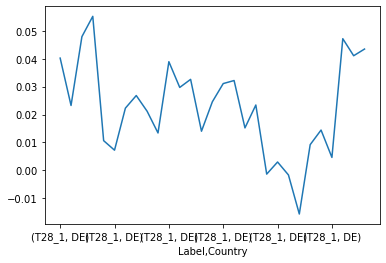

In [16]:
# Using dfm, check Return on Equity ('T28_1') for German banks - ignore the error warning
print(df_defs.loc['T28_1'])
dfm.loc[('T28_1', 'DE')]['value'].plot()

---

**Required (3b)**: Using `pd.pivot_table`, create a pivoted data frame (`dfp`) from `dfm`.

- `values` should be `value`, 
- `index` should be `Country` and `Date`, 
- `columns` should be `Label`.



In [17]:
dfp = pd.pivot_table(dfm.reset_index(), values="value", index=['Country', 'Date'], columns=["Label"])
dfp

Label            RE_T11_1  RE_T11_2  RE_T11_3  RE_T11_4   RE_T12_1  RE_T12_2  \
Country Date                                                                   
AT      201409  30.512423  0.288271  1.111510  0.036428  13.516996  0.127704   
        201412  30.443341  0.294433  1.168268  0.038375  13.802631  0.133492   
        201503  31.002563  0.296162  1.231659  0.039728  13.350117  0.127531   
        201506  30.933519  0.299060  1.111891  0.035945  13.970295  0.135063   
        201509  31.779096  0.300659  1.056545  0.033247  13.749023  0.130078   
...                   ...       ...       ...       ...        ...       ...   
SK      202009   4.486492  0.186188  0.085582  0.019075   1.284255  0.053296   
        202012   4.489190  0.188378  0.082612  0.018402   1.247338  0.052342   
        202103   4.478703  0.185803  0.077469  0.017297   1.341149  0.055639   
        202106   4.690431  0.198340  0.075414  0.016078   1.325612  0.056055   
        202109   4.936428  0.206365  0.034842  0.007058   1.316148  0.055021   

Label           RE_T12_3  RE_T12_4     T01_1     T01_2  ...     T91_6  \
Country Date                                            ...             
AT      201409  0.896956  0.066358  0.038263  0.009538  ...       NaN   
        201412  0.840082  0.060864  0.042391  0.008427  ...       NaN   
        201503  0.835253  0.062565  0.043766  0.008772  ...       NaN   
        201506  0.804948  0.057619  0.051577  0.008133  ...       NaN   
        201509  0.779785  0.056716  0.058128  0.007680  ...       NaN   
...                  ...       ...       ...       ...  ...       ...   
SK      202009  0.052759  0.041082  0.063152  0.001183  ...  0.571778   
        202012  0.052147  0.041807  0.078982  0.000393  ...  0.533103   
        202103  0.044405  0.033110  0.160190  0.000370  ...  0.520792   
        202106  0.045273  0.034152  0.172619  0.000366  ...  0.541260   
        202109  0.050948  0.038710  0.149294  0.000351  ...  0.556124   

Label              T92_1     T92_2     T92_3     T92_4     T92_5     T93_1  \
Country Date                                                                 
AT      201409       NaN       NaN       NaN       NaN       NaN       NaN   
        201412       NaN       NaN       NaN       NaN       NaN       NaN   
        201503       NaN       NaN       NaN       NaN       NaN       NaN   
        201506       NaN       NaN       NaN       NaN       NaN       NaN   
        201509       NaN       NaN       NaN       NaN       NaN       NaN   
...                  ...       ...       ...       ...       ...       ...   
SK      202009  0.277253  0.004130  0.033575  0.014873  0.522340  0.313736   
        202012  0.483023  0.018431  0.017764  0.006287  0.450820  0.389866   
        202103  0.588348  0.021601  0.012440  0.005519  0.458762  0.414436   
        202106  0.675799  0.016172  0.013533  0.011156  0.532298  0.438231   
        202109  0.698806  0.008382  0.021911  0.015998  0.711220  0.451629   

Label              T93_2     T93_3     T93_4  
Country Date                                  
AT      201409       NaN       NaN       NaN  
        201412       NaN       NaN       NaN  
        201503       NaN       NaN       NaN  
        201506       NaN       NaN       NaN  
        201509       NaN       NaN       NaN  
...                  ...       ...       ...  
SK      202009  0.203883  0.002547  0.397137  
        202012  0.362830  0.003808  0.550512  
        202103  0.413255  0.002488  0.655823  
        202106  0.534945  0.004721  0.324923  
        202109  0.522438  0.007912  0.353418  

[928 rows x 160 columns]

Check total assets for Dutch banks `NL`.

<AxesSubplot:xlabel='Date'>

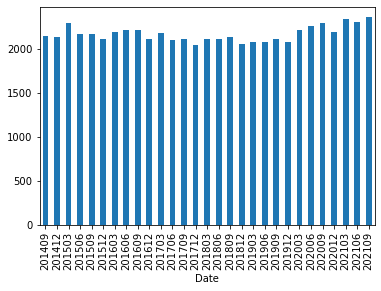

In [18]:
dfp['T02_1'].loc['NL'].plot(kind='bar')

**Required (3c)**: Check Level 3 assets for Greek banks. But note, get rid of the entries with values of zero.

<AxesSubplot:xlabel='Date'>

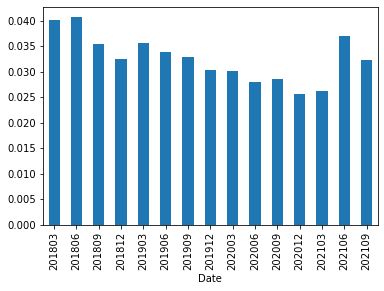

In [19]:
dfp['T14_3'].loc['GR'].replace(0, np.NaN).dropna().plot(kind='bar')

---

**Required (4a)**: Group variables of the fair value hierarchy (`T14_1`, `T14_2`, `T14_3`) by `Country` and plot the means of these variables using a bar-plot.

In [20]:
# checking CET 1 capital ratio, grouped by Date

print(df_defs.loc['T14_1'])
print(df_defs.loc['T14_1'])
print(df_defs.loc['T14_1'])

#dfm.loc['T14_1'].groupby('Date').mean().plot(kind='bar')

Item    Level 1 financial assets
Name: T14_1, dtype: object
Item    Level 1 financial assets
Name: T14_1, dtype: object
Item    Level 1 financial assets
Name: T14_1, dtype: object


<AxesSubplot:xlabel='Country'>

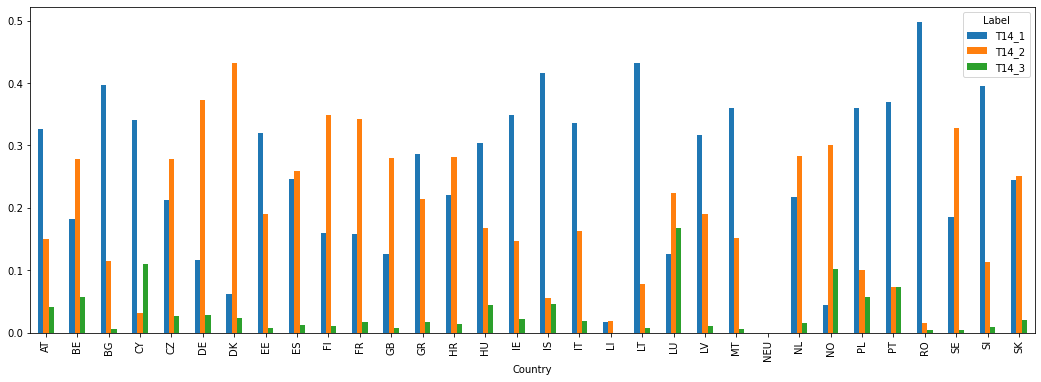

In [21]:
dfp[['T14_1','T14_2','T14_3']].groupby('Country').mean().plot(kind='bar', figsize=(18,6))

<AxesSubplot:xlabel='Date'>

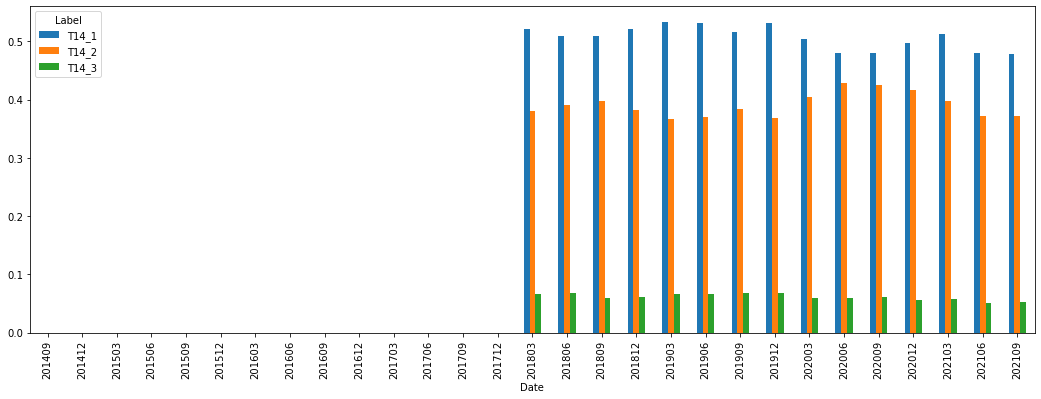

In [22]:
dfp[['T14_1','T14_2','T14_3']].groupby('Date').mean().plot(kind='bar', figsize=(18,6))

---

**Required (4b)**: Create a `groupby` object and use it to plot the means of the variables (`T14_1`, `T14_2`, `T14_3`) by `Date` using a bar-plot.

Follow these steps:

- first create the `groupby` object named `df_gp_date`,
- using `df_gp_date` check the mean values of the three variables (`T14_1`, `T14_2`, `T14_3`),
- using `df_gp_date` check the mean values of the three variables - and assign the resulting frame to a new data frame named: `df_levels`,
- replace all zero-values  in `df_levels` from the frame by NaNs,
- eliminate empty rows from the frame using `dropna()`,
- plot the resulting data frame.

In [23]:
df_gp_date  = dfp.groupby('Date')

In [24]:
df_gp_date[['T14_1','T14_2','T14_3']].mean().head()

Label,T14_1,T14_2,T14_3
Date,,,
201409,0.0,0.0,0.0
201412,0.0,0.0,0.0
201503,0.0,0.0,0.0
201506,0.0,0.0,0.0
201509,0.0,0.0,0.0


In [25]:
df_levels = df_gp_date[['T14_1','T14_2','T14_3']].mean()
df_levels

Label,T14_1,T14_2,T14_3
Date,,,
201409,0.000000,0.000000,0.000000
201412,0.000000,0.000000,0.000000
201503,0.000000,0.000000,0.000000
201506,0.000000,0.000000,0.000000
201509,0.000000,0.000000,0.000000
201512,0.000000,0.000000,0.000000
201603,0.000000,0.000000,0.000000
201606,0.000000,0.000000,0.000000
201609,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='Date'>

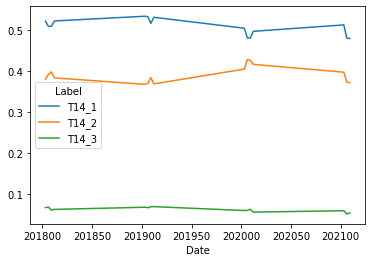

In [26]:
df_levels.replace(0, np.NaN).dropna().plot()